### 1. Support Vector Machines with different kernels

##### 1.1  Tuning hyper parameters using Grid Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from os import path
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Import data
data = np.genfromtxt(path.join('data/mnistsub.csv'), delimiter=',', dtype=float)
X = np.array([data[:, 0], data[:, 1]]).T
y = np.array([data[:, 2]]).T

# Split data into training set and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=10)

# Params to be tested
gamma = np.array([.1, .5, 1])
C = np.array([1, 100, 1000])
D = np.array([3, 5, 7])

# Compile grids for grid search
grid_linear = np.array([[0, 0, 0], [1, 10, 100]]).T  # zeroes-column is used for grid search compatibility
grid_rbf = np.array([gamma, C]).T
grid_poly = np.array([D, C]).T

# Instantiate some SVCs with different kernels and hyperparameters
rbf = SVC(kernel='rbf', gamma=.5, C=20)
linear = SVC(kernel='linear', C=20)
poly = SVC(kernel='poly', C=20, degree=3)

# Tune neccessary hyperparams using grid search
rbf_params = utils.gridSearch(X_train, y_train, X_validation, y_validation, grid_rbf, rbf)
print(f"Best RBF params: \t C={rbf_params[0]}, gamma={rbf_params[1]}")

lin_params = utils.gridSearch(X_train, y_train, X_validation, y_validation, grid_linear, linear)
print(f"Best Linear params: \t C={lin_params[0]}")

poly_params = utils.gridSearch(X_train, y_train, X_validation, y_validation, grid_poly, poly)
print(f"Best Poly params: \t Deg={poly_params[0]}, c={poly_params[1]}")

Best RBF params: 	 C=1.0, gamma=0.1
Best Linear params: 	 C=1
Best Poly params: 	 Deg=1, c=3


##### 1.2 Plots of different decision boundaries

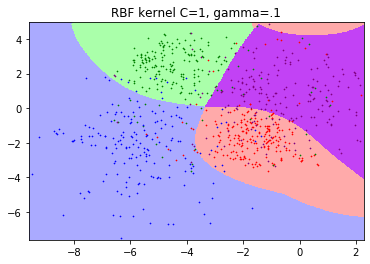

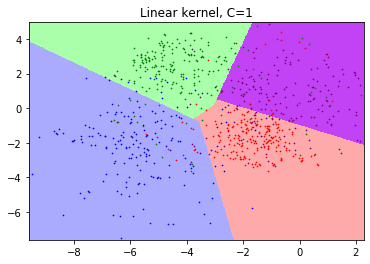

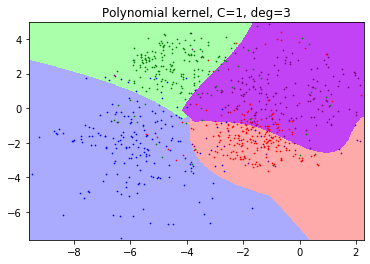

In [2]:
# Best values fitting (hard coded)
rbf = SVC(kernel='rbf', gamma=.1, C=1).fit(X_train, y_train.ravel())
linear = SVC(kernel='linear', C=1).fit(X_train, y_train.ravel())
poly = SVC(kernel='poly', C=1, degree=3).fit(X_train, y_train.ravel())

# Filter data into their respective multi-class
nine = data[data[:, 2] == 9]
five = data[data[:, 2] == 5]
three = data[data[:, 2] == 3]
ones = data[data[:, 2] == 1]

# RBF PLOT
utils.createMesh(X, rbf, plt)
plt.scatter(ones[:, 0], ones[:, 1], color='red', marker='x', s=0.5)
plt.scatter(three[:, 0], three[:, 1], color='green', marker='x', s=0.5)
plt.scatter(five[:, 0], five[:, 1], color='blue', marker='x', s=0.5)
plt.scatter(nine[:, 0], nine[:, 1], color='purple', marker='x', s=0.5)
plt.title("RBF kernel C=1, gamma=.1")
plt.show()

# LINEAR PLOT
utils.createMesh(X, linear, plt)
plt.scatter(ones[:, 0], ones[:, 1], color='red', marker='x', s=0.5)
plt.scatter(three[:, 0], three[:, 1], color='green', marker='x', s=0.5)
plt.scatter(five[:, 0], five[:, 1], color='blue', marker='x', s=0.5)
plt.scatter(nine[:, 0], nine[:, 1], color='purple', marker='x', s=0.5)
plt.title("Linear kernel, C=1")
plt.show()

# POLY PLOT
utils.createMesh(X, poly, plt)
plt.scatter(ones[:, 0], ones[:, 1], color='red', marker='x', s=0.5)
plt.scatter(three[:, 0], three[:, 1], color='green', marker='x', s=0.5)
plt.scatter(five[:, 0], five[:, 1], color='blue', marker='x', s=0.5)
plt.scatter(nine[:, 0], nine[:, 1], color='purple', marker='x', s=0.5)
plt.title("Polynomial kernel, C=1, deg=3")
plt.show()

